# NLP Pipelines Demos

This notebook shows a few demos to help understand the nlp pipelines package.

In [1]:
# install dependencies
%pip install -r requirements.txt 

# required for the demo
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Example: Simple Data, Clustered

For perhaps the simplest example, let's take a small toy dataset/corpus and make clusters. First we'll use methods individually, then we'll use the pipeline object to help simplify.

### Using Specific Methods

You can use any of the methods directly. For example, we can clean text or use a bag of words vectorization.

In [2]:

from nlp_pipelines.vectorizer import Bow
from nlp_pipelines.dataset import Dataset
from nlp_pipelines import preprocess

# First, a simple dataset for demonstration
texts = [
    "The new stethoscope model by Littmann is available now.",
    "Philips unveils an innovative heart monitor with improved accuracy.",
    "Medtronic announces a breakthrough in robotic surgery technology.",
    "GE Healthcare's ultrasound device provides high-definition imaging.",
    "Stryker introduces a new orthopedic surgical tool.",
    "Johnson & Johnson releases a new line of surgical instruments.",
    "Siemens Healthineers develops a state-of-the-art MRI scanner.",
    "Boston Scientific launches a catheter designed for heart surgery."
]
dataset = Dataset(texts)

print(dataset)


/opt/homebrew/Caskroom/miniconda/base/envs/spade/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Dataset with 8 texts
Texts: ['The new stethoscope model by Littmann is available now.', 'Philips unveils an innovative heart monitor with improved accuracy.']... +6 more>


In [3]:
# let's remove stopwords (uninformative words)
stopword_remover = preprocess.StopwordRemove()

dataset = stopword_remover.transform(dataset)
print(dataset.texts)

['new stethoscope model Littmann available', 'Philips unveils innovative heart monitor improved accuracy', 'Medtronic announces breakthrough robotic surgery technology', 'GE Healthcare ultrasound device provides high definition imaging', 'Stryker introduces new orthopedic surgical tool', 'Johnson Johnson releases new line surgical instruments', 'Siemens Healthineers develops state art MRI scanner', 'Boston Scientific launches catheter designed heart surgery']


In [4]:
# let's lemmatize to see what that does too

lemmatizer = preprocess.Lemmatize()

dataset = lemmatizer.transform(dataset)
print(dataset.texts)

['new stethoscope model Littmann available', 'philip unveil innovative heart monitor improved accuracy', 'medtronic announce breakthrough robotic surgery technology', 'GE Healthcare ultrasound device provide high definition imaging', 'stryker introduce new orthopedic surgical tool', 'Johnson Johnson release new line surgical instrument', 'Siemens Healthineers develop state art MRI scanner', 'Boston Scientific launch catheter design heart surgery']


In [5]:
# ok, maybe this is reasonable to vectorize?

vectorizer = Bow()

vectorizer.fit(dataset)
dataset = vectorizer.transform(dataset) # for now, the same dataset since it's all we have

print(dataset) # show us the state of the dataset
print(dataset.vectors) # show us just the vectors


<Dataset with 8 texts, vectors: 47-dim
Texts: ['new stethoscope model Littmann available', 'philip unveil innovative heart monitor improved accuracy']... +6 more>
[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
  0 0 0 0 1 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 1 0 0 0 0 0 1 0 0 0 1 0 0
  0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
  0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 1 0 0 0 0 0]]


In [6]:
# to make this end to end, let's try to cluster to see what that gets us
from nlp_pipelines.clusterer import Kmeans

model = Kmeans(num_clusters=2, random_state=101)

model.fit(dataset)
dataset = model.predict(dataset)

print(dataset) # what's in the dataset now
print(dataset.results) # what are the results


<Dataset with 8 texts, vectors: 47-dim, results: 8 items
Texts: ['new stethoscope model Littmann available', 'philip unveil innovative heart monitor improved accuracy']... +6 more\Results: [1 1]... +6 more>
[1 1 1 1 0 0 1 1]


### Using a pipeline

Instead of doing these one by one, a helper class "Pipeline" lets us define these as a pipeline and run them all together.

In [7]:
from nlp_pipelines.pipeline import Pipeline

pipeline = Pipeline([
    {"name": "preproc1", "method": "preprocess.StopwordRemove"},
    {"name": "preproc2", "method": "preprocess.Lemmatize"},
    {"name": "vectorize", "method": "vectorizer.Bow"},
    {"name": "cluster", "method": "clusterer.Kmeans", "params":{"num_clusters":2, "random_state": 101}}
])
pipeline.set_data(train_data=dataset, run_data=dataset) # for now, train and run on the same data
pipeline.run()

print("Results:", pipeline.run_data.results)




Results: [1 1 1 1 0 0 1 1]


Same results, since it's the same pipeline.

Also, the intermediate results are still part of the pipeline's dataset.

In [8]:
# the dataset keeps the last of the other things it's seen

# original text
print("Original texts:", pipeline.run_data.original_texts)
# preprocessed text
print("Preprocessed texts:", pipeline.run_data.texts)
# vectors
print("Vectors:", pipeline.run_data.vectors)

Original texts: ['The new stethoscope model by Littmann is available now.', 'Philips unveils an innovative heart monitor with improved accuracy.', 'Medtronic announces a breakthrough in robotic surgery technology.', "GE Healthcare's ultrasound device provides high-definition imaging.", 'Stryker introduces a new orthopedic surgical tool.', 'Johnson & Johnson releases a new line of surgical instruments.', 'Siemens Healthineers develops a state-of-the-art MRI scanner.', 'Boston Scientific launches a catheter designed for heart surgery.']
Preprocessed texts: ['new stethoscope model Littmann available', 'philip unveil innovative heart monitor improved accuracy', 'medtronic announce breakthrough robotic surgery technology', 'GE Healthcare ultrasound device provide high definition imaging', 'stryker introduce new orthopedic surgical tool', 'Johnson Johnson release new line surgical instrument', 'Siemens Healthineers develop state art MRI scanner', 'Boston scientific launch catheter design hea

## Example: Simple Data, Classified

Now, let's pick a dataset with truths and use that to classify the documents

In [9]:
texts = ["I love this movie", "This is terrible", "Fantastic work", "Awful experience", "It was okay"]
truths = ["positive", "negative", "positive", "negative", "neutral"]
dataset = Dataset(texts, truths)

print(dataset)

train, test = dataset.split(count=3, labeled=True)
print(train, test)


<Dataset with 5 texts
Texts: ['I love this movie', 'This is terrible']... +3 more
Truths: ['positive', 'negative']... +3 more>
<Dataset with 3 texts
Texts: ['This is terrible', 'Fantastic work']... +1 more
Truths: ['negative', 'positive']... +1 more> <Dataset with 2 texts
Texts: ['I love this movie', 'It was okay']
Truths: ['positive', 'neutral']>


In [10]:
# the words are quite different, so low co-occurence is going to break tfidf/bow; let's try to embed with a sentence embedding to get context!

pipeline = Pipeline([
    {"name": "vectorize", "method": "vectorizer.SentenceEmbedding"},
    {"name": "classify", "method": "classifier.Xgboost"}
])


pipeline.set_data(train_data=train, run_data=test) # now we have different train and test data!
pipeline.run()

print("Results:", pipeline.run_data.results)
print("Truths:", pipeline.run_data.truths) # TODO evaluation code was not finished for all result types as of the writing of this.

# I ran it without a seed, and got 1/2 right, so maybe three sentences isn't enough to train a tree model ;)

/opt/homebrew/Caskroom/miniconda/base/envs/spade/lib/python3.12/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/spade/lib/python3.12/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Results: ['negative' 'negative']
Truths: ['positive', 'neutral']


## Example: Simple Data, Labeled

Finally, we have labeling (formerly "keyword extraction"); retuning 0 to n labels.
However, we have two different kinds of labelers: extractive ones pick important words from the document. Predictive ones take the list of labels and try to predict which apply to text.

In any case, let's start with the dataset.

In [11]:
# common dataset
texts = [
    "Patient shows symptoms of fever and cough, possible pneumonia diagnosis.",
    "Headache and nausea reported, likely migraine.",
    "Frequent urination and fatigue, potential diabetes condition.",
    "Coughing and shortness of breath, indicative of respiratory infection.",
    "Reports of dizziness, nausea, and blurred vision, possible stroke."
]

truths = [
    ["pneumonia", "respiratory infection"],
    ["migraine"],
    ["diabetes"],
    ["respiratory infection"],
    ["stroke"]
]

possible_labels = ["pneumonia", "migraine", "diabetes", "respiratory infection", "stroke"]

# Create the Dataset object
dataset = Dataset(texts, truths)

print(dataset)


<Dataset with 5 texts
Texts: ['Patient shows symptoms of fever and cough, possible pneumonia diagnosis.', 'Headache and nausea reported, likely migraine.']... +3 more
Truths: [['pneumonia', 'respiratory infection'], ['migraine']]... +3 more>


### Extractive Labeling
What are the top 2 words according to an extractive labeler? Let's clean a little bit then try it!

In [12]:
pipeline = Pipeline([
    {"name": "preprocess", "method": "preprocess.Lemmatize"},
    {"name": "extract", "method": "labeler.Yake", "params":{"top_k":2}}
])


pipeline.set_data(train_data=dataset, run_data=dataset)
pipeline.run()

print("Results:", pipeline.run_data.results) # not sure how to best evaluate extractive keywords in our context.

Results: [['patient show symptom', 'patient show'], ['Headache and nausea', 'nausea report'], ['potential diabetes condition', 'frequent urination'], ['cough and shortness', 'shortness of breath'], ['report of dizziness', 'nausea']]


## Predictive labeling
Let's use a method to predict which keywords from our list seem to best apply. We'll need to embed more things.

In [13]:
pipeline = Pipeline([
    {"name": "vectorize", "method": "vectorizer.SentenceEmbedding"},
    {"name": "predict", "method": "labeler.ThresholdSim"}
])

# we overwrite the previous instance of the dataset, so let's make a clean copy
dataset = Dataset(texts, truths)
train, test = dataset.split(count=3)

pipeline.set_data(train_data=train, run_data=test, possible_labels=possible_labels)
pipeline.run()

print("Results:", pipeline.run_data.results) # TODO! it only SORTS the keywords on distance right now! Do the threshold.
print("Truths:", pipeline.run_data.truths)

Results: [['pneumonia', 'respiratory infection', 'migraine', 'diabetes', 'stroke'], ['diabetes', 'respiratory infection', 'migraine', 'stroke', 'pneumonia']]
Truths: None


## Real Data Demos

Let's load some real data (`./demo_data`)

`sample_5_newsgroup_text.parquet` contains text posted in 5 newsgroups, with labels; adapted from [SetFit/20_newsgroups](https://huggingface.co/datasets/SetFit/20_newsgroups).

`springer-127-parsed.json` contains abstracts and keywords from the journal [Social Psychiatry and Psychiatric Epidemiology](https://link.springer.com/journal/127)


In [14]:
newsgroups = Dataset.from_parquet("./demo_data/sample_5_newsgroup_text.parquet", text_field="text", truth_field="label_text")

abstracts = Dataset.from_json("./demo_data/springer-127-parsed.json", text_field="abstract", truth_field="keywords")

### Clustering both

We can test a few more of the clustering methods on this real data.

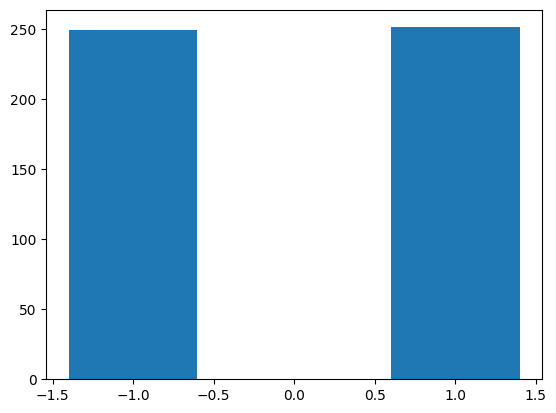

In [15]:
import matplotlib.pyplot as plt

newsgroups_pipeline = Pipeline([
    {"name": "preproc1", "method": "preprocess.Stem"},
    {"name": "vectorize", "method": "vectorizer.Tfidf"},
    {"name": "cluster", "method": "clusterer.Svm"}
])

newsgroups_pipeline.set_data(newsgroups, newsgroups)
newsgroups_pipeline.run()

res = list(newsgroups_pipeline.run_data.results)

counts = {}

for i in set(res):
    counts[i] = res.count(i)

plt.bar(counts.keys(), counts.values())
plt.show()

Read 0M words
Number of words:  2722
Number of labels: 0
Progress: 100.0% words/sec/thread:  125998 lr:  0.000000 avg.loss:  2.585544 ETA:   0h 0m 0s
/opt/homebrew/Caskroom/miniconda/base/envs/spade/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/spade/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


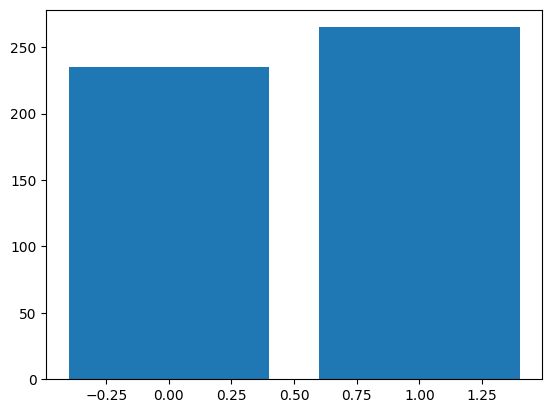

In [16]:
# and similar for the abstracts

abstracts_pipeline = Pipeline([
    {"name": "preproc1", "method": "preprocess.TokenFilter", "params":{"remove_if":["is_stop", "is_punct", "is_space", "like_num", "like_url", "like_email"]}},
    {"name": "vectorize", "method": "vectorizer.FastText"},
    {"name": "cluster", "method": "clusterer.GraphAffinity", "args":{"num_clusters": 2}}
])

abstracts_pipeline.set_data(abstracts, abstracts)
abstracts_pipeline.run()

res = list(abstracts_pipeline.run_data.results)

counts = {}

for i in set(res):
    counts[i] = res.count(i)

plt.bar(counts.keys(), counts.values())
plt.show()

## Classification

Let's classify our newsgroup data. Also, let's pretend we train on train, save the pipeline, then use the trained pipeline "later".

In [18]:
newsgroups = Dataset.from_parquet("./demo_data/sample_5_newsgroup_text.parquet", text_field="text", truth_field="label_text")

train, test = newsgroups.split(ratio=0.2, labeled=True, splitLabeled=True)

newsgroups_pipeline = Pipeline([
    {"name": "preproc1", "method": "preprocess.TokenFilter", "params":{"remove_if":["is_stop", "is_punct", "is_space", "like_num", "like_url", "like_email"]}},
    {"name": "vectorize", "method": "vectorizer.SentenceEmbedding"},
    {"name": "cluster", "method": "classifier.LabelProp"}
])

newsgroups_pipeline.set_data(train_data=train)
newsgroups_pipeline.train()

newsgroups_pipeline.save("./demo_data/newsgroups_demo.pickle")

loaded_pipeline = Pipeline.load("./demo_data/newsgroups_demo.pickle")
loaded_pipeline.set_data(run_data=test)
loaded_pipeline.predict()

loaded_pipeline.run_data.results

array(['talk.politics.guns', 'comp.graphics', 'comp.graphics',
       'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'rec.autos',
       'comp.graphics', 'comp.graphics', 'comp.graphics',
       'talk.politics.guns', 'talk.politics.guns', 'rec.autos',
       'talk.politics.guns', 'rec.autos', 'comp.sys.mac.hardware',
       'comp.graphics', 'comp.graphics', 'talk.politics.guns',
       'talk.politics.guns', 'sci.space', 'comp.sys.mac.hardware',
       'comp.sys.mac.hardware', 'comp.graphics', 'comp.graphics',
       'comp.graphics', 'rec.autos', 'comp.sys.mac.hardware',
       'comp.graphics', 'comp.sys.mac.hardware', 'talk.politics.guns',
       'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics',
       'rec.autos', 'rec.autos', 'sci.space', 'comp.graphics',
       'rec.autos', 'rec.autos', 'sci.space', 'rec.autos',
       'comp.graphics', 'comp.graphics', 'talk.politics.guns',
       'comp.graphics', 'talk.politics.guns', 'comp.sys.mac.hardware',
       'comp.graph

In [20]:
from nlp_pipelines.evaluate import evaluate

evaluate(loaded_pipeline.run_data)

{'accuracy': 0.74,
 'precision_macro': 0.7632585845293335,
 'recall_macro': 0.7475939087768196,
 'f1_macro': 0.7338578108532703}